In [21]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
def set_seed_everywhere(seed, cuda = True):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

In [3]:
SEED = 1668
set_seed_everywhere(SEED)

### Download

Download train and test dataset, but it will be mixed and a 3rd group, `validation` will be created

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

Files already downloaded and verified


In [5]:
X = [entry[0] for entry in trainset] + [entry[0] for entry in testset]
y = [entry[1] for entry in trainset] + [entry[1] for entry in testset]

### Create Train, Test, and Validation datasets

In [6]:
test_ratio = 0.15
valid_ratio = 0.15

valid_ratio = valid_ratio / (1.0 - test_ratio)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = valid_ratio, random_state = SEED)

In [8]:
print(f"Train dataset size: {len(X_train)}")
print(f"Test dataset size: {len(X_test)}")
print(f"Validation dataset size: {len(X_val)}")

Train dataset size: 42000
Test dataset size: 9000
Validation dataset size: 9000


In [35]:
def show_image(image):
    np_img = image.numpy()
    plt.xlabel = "Bra"
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

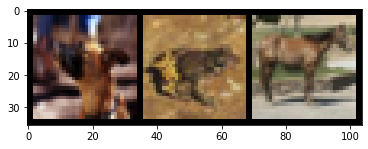

[5, 6, 7]


In [38]:
images = [X_train[0], X_test[0], X_val[0]]
labels = [y_train[0], y_test[0], y_val[0]]

show_image(torchvision.utils.make_grid(images))
print(labels)